# Project - Global Shark Attacks

In [63]:
import src.analysis as analysis
#from src.analysis import *

In [3]:
#importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import plotly.express as px
import plotly.graph_objects as go
import os

## Importing and encoding the dataset

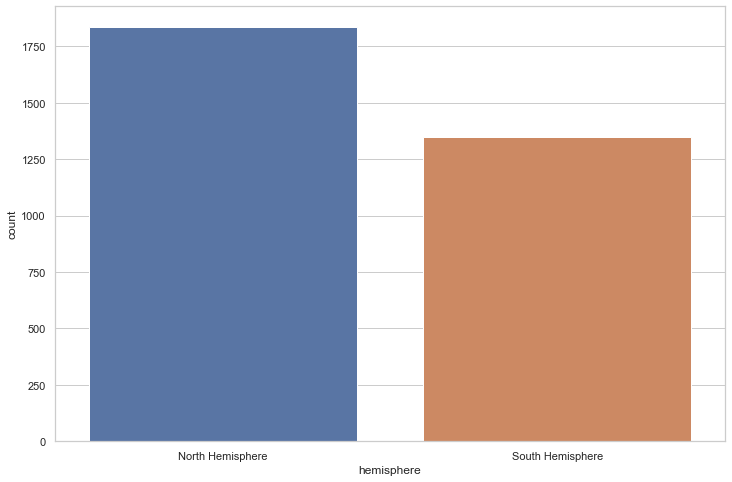

In [64]:
analysis.hemisphere_count()

In [66]:
#loading the dataset
attacks = pd.read_csv("./input/attacks.csv",encoding='latin1')

In [6]:
attacks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploring the dataset general info

In [7]:
attacks.shape

(25723, 24)

### Exploring the dataset missing values info


In [8]:
#checking missing values per column
Nan_attacks= attacks.isna().sum()
missing_value_attack = pd.DataFrame({'Feature': attacks.columns,
                                 'Missing values': Nan_attacks})
missing_value_attack

,Feature,Missing values
Case Number,Case Number,17021
Date,Date,19421
Year,Year,19423
Type,Type,19425
Country,Country,19471
Area,Area,19876
Location,Location,19961
Activity,Activity,19965
Name,Name,19631
Sex,Sex,19986


In [9]:
#checking missing values percentages
percent_missing = attacks.isnull().sum() * 100 / len(attacks)
percent_missing
Nan_attack_percentage = pd.DataFrame({'Feature': attacks.columns,
                                 'Missing %': percent_missing})
Nan_attack_percentage 

,Feature,Missing %
Case Number,Case Number,66.170353
Date,Date,75.500525
Year,Year,75.508300
Type,Type,75.516075
Country,Country,75.694903
Area,Area,77.269370
Location,Location,77.599813
Activity,Activity,77.615364
Name,Name,76.316915
Sex,Sex,77.697003


In [10]:
#deleting columns with 100% missing values
attacks.pop("Unnamed: 22")
attacks.pop("Unnamed: 23")


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
25718    NaN
25719    NaN
25720    NaN
25721    NaN
25722    NaN
Name: Unnamed: 23, Length: 25723, dtype: object

In [11]:
#checking the number of columns
attacks.shape

(25723, 22)

###  Deleting ignorable missing values

In [12]:
#poping missing values having age as reference
attacks.dropna(subset=['Age'], inplace = True)

In [13]:
#dataframe updated after ignorable NaN deletion
attacks.shape

(3471, 22)

In [14]:
#checking updated missing values percentages after poping Unnamed:22 and :23
percent_missing = attacks.isnull().sum() * 100 / len(attacks)
percent_missing
Nan_attack_percentage = pd.DataFrame({'Feature': attacks.columns,
                                 'Missing %': percent_missing})
Nan_attack_percentage 

,Feature,Missing %
Case Number,Case Number,0.000000
Date,Date,0.000000
Year,Year,0.028810
Type,Type,0.028810
Country,Country,0.259291
Area,Area,3.399597
Location,Location,4.321521
Activity,Activity,4.091040
Name,Name,0.316912
Sex,Sex,1.094785


In [15]:
#checking updated min, max and mean missing values percentages after poping Unnamed:22 and :23
print(Nan_attack_percentage['Missing %'].mean())
print(Nan_attack_percentage['Missing %'].max())
print(Nan_attack_percentage['Missing %'].min())

4.062229904926534
36.81936041486603
0.0


### Standardizing columns

#### Deleting columns with information that will not be used

In [16]:
#evaluating columns
attacks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [17]:
#deleting columns with info that will not be needed
attacks.pop("Investigator or Source")
attacks.pop("pdf")
attacks.pop("href formula")
attacks.pop("href")
attacks.pop("original order")
attacks.pop("Case Number.1")
attacks.pop("Case Number.2")
attacks.pop("Case Number")
attacks.pop("Time")
attacks.pop("Name")

0                  Julie Wolfe
1              Adyson McNeely 
2                  John Denges
6       Jose Ernesto da Silva 
7                         male
                 ...          
6243                      male
6254                Sandrillio
6265                      male
6276                 a servant
6301                      male
Name: Name, Length: 3471, dtype: object

In [18]:
#updating evaluating columns
attacks.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Species '],
      dtype='object')

In [19]:
#check the shape
attacks.shape

(3471, 12)

### Standardizing columns names 

In [20]:
#Creating a dictionary and standardazing columns names
dict_attacks_rename = {column : column.lower().strip() for column in attacks}
attacks = attacks.rename(dict_attacks_rename, axis = 1)
attacks.columns

Index(['date', 'year', 'type', 'country', 'area', 'location', 'activity',
       'sex', 'age', 'injury', 'fatal (y/n)', 'species'],
      dtype='object')

### Exploring type and values

In [21]:
#checking for duplicates
attacks.duplicated().sum()

0

In [22]:
#printing types and one example of case
print(attacks.dtypes)
print(attacks.iloc[0])

date            object
year           float64
type            object
country         object
area            object
location        object
activity        object
sex             object
age             object
injury          object
fatal (y/n)     object
species         object
dtype: object
date                                                 25-Jun-2018
year                                                      2018.0
type                                                     Boating
country                                                      USA
area                                                  California
location                             Oceanside, San Diego County
activity                                                Paddling
sex                                                            F
age                                                           57
injury         No injury to occupant, outrigger canoe and pad...
fatal (y/n)                                                 

### Cleaning variables

#### Date

In [23]:
#explore data counts
attacks["date"].value_counts()

12-Apr-2001     5
15-Apr-2018     4
05-Oct-2003     4
23-Jan-1970     4
1970s           4
               ..
22-Nov-2003     1
12-Nov-2003     1
12-Nov-2003     1
27-Oct-2003     1
1845-1853       1
Name: date, Length: 3104, dtype: int64

In [24]:
 list(attacks["date"].unique())

['25-Jun-2018',
 '18-Jun-2018',
 '09-Jun-2018',
 '03-Jun-2018',
 '27-May-2018',
 '26-May-2018',
 '24-May-2018',
 '21-May-2018',
 '13-May-2018',
 'May 2018',
 '28-Apr-2018',
 '25-Apr-2018',
 '23-Apr-2018',
 '22-Apr-2018',
 '19-Apr-2018',
 '15-Apr-2018',
 'Reported 10-Apr-2018',
 '05-Apr-2018',
 '03-Apr-2018',
 '31-Mar-2018',
 '14-Mar-2018',
 '9-Mar-2018',
 '24-Feb-2018',
 '23-Feb-2018',
 '18-Feb-2018',
 '15-Feb-2018',
 '11-Feb-2018',
 '03-Feb-2018',
 '01-Feb-2018',
 '28-Jan-2018',
 '21-Jan-2018',
 '13-Jan-2018',
 '12-Jan-2018',
 '31-Dec-2017',
 '30-Dec-2017',
 '21-Dec-2017',
 '09-Dec-2017',
 '30-Nov-2017',
 '24-Nov-2017',
 '18-Nov-2017',
 'Reported 13-Nov-2017',
 '13-Nov-2017',
 '04-Nov-2017',
 'Reported 31-Oct-2017',
 '28-Oct-2017',
 '23-Oct-2017',
 '22-Oct-2017',
 '09-Oct-2017',
 '05-Oct-2017',
 '01-Oct-2017',
 '24-Sep-2017',
 '16-Sep-2017',
 '15-Sep-2017',
 '13-Sep-2017',
 '10-Sep-2017',
 '03-Sep-2017',
 '02-Sep-2017',
 '29-Aug-2017',
 '27-Aug-2017',
 '26-Aug-2017',
 '23-Aug-2017',
 

In [25]:
#extract month from date
attacks['date'] = attacks['date'].str.extract('(-\D{3}-)', expand=True)

In [26]:
#remove - as separator
regex_list = [r"(-\D{3}-): ", r"-"]
attacks['date'] = attacks['date'].replace(regex=regex_list, value="")

In [27]:
#create column month
attacks['month']=attacks['date']

In [28]:
#check unique values
attacks["month"].unique()

array(['Jun', 'May', nan, 'Apr', 'Mar', 'Feb', 'Jan', 'Dec', 'Nov', 'Oct',
       'Sep', 'Aug', 'Jul'], dtype=object)

In [29]:
#count months
attacks["month"].value_counts()

Jul    399
Aug    356
Sep    327
Jun    286
Jan    275
Oct    265
Apr    261
Dec    258
Mar    225
May    222
Nov    218
Feb    194
Name: month, dtype: int64

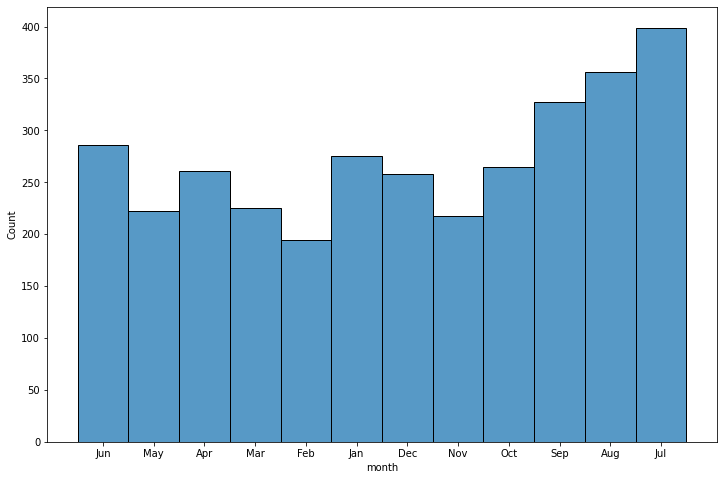

In [30]:
fig, ax = plt.subplots(figsize=(12, 8))
attacks.dropna(subset=['month'], inplace = True)
sns.histplot(ax=ax,data=attacks, x="month")
fig.savefig('/Users/Juliana/Desktop/Ironhack/Projects/Ironhack-Project/figures/EDA/month.png')

#### Year

In [31]:
#transforming year from float to integer
attacks.dropna(subset=['year'], inplace = True)
attacks.year = attacks.year.astype(int)

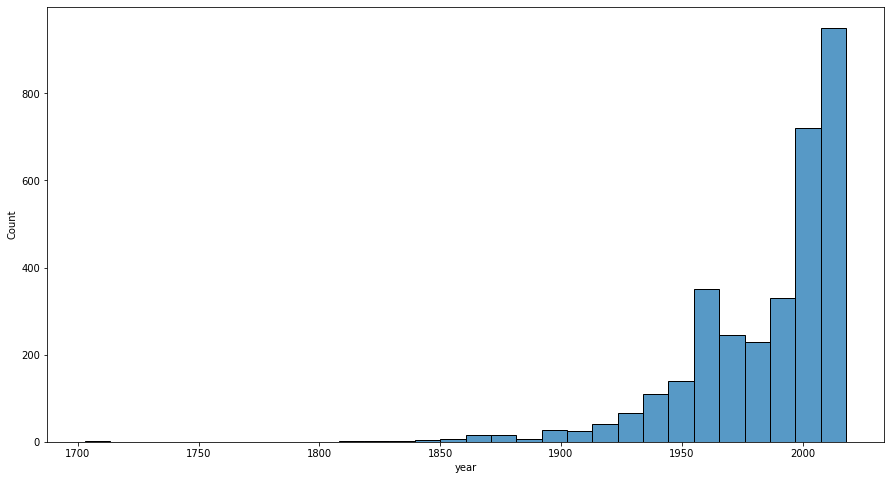

In [32]:
#plotting year distribution
fig, ax = plt.subplots(figsize=(15, 8))
sns.histplot(x=attacks.year, bins=30)
fig.savefig('/Users/Juliana/Desktop/Ironhack/Projects/Ironhack-Project/figures/EDA/Year_all.png')

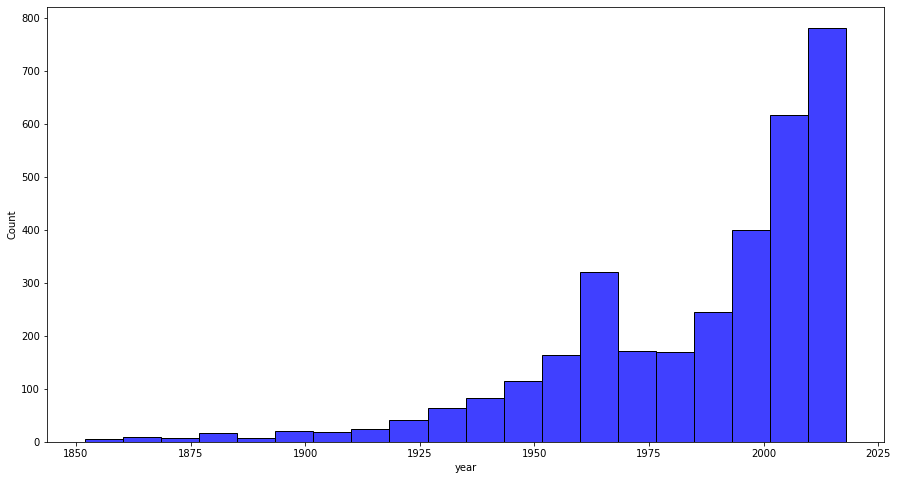

In [33]:
#Removing the data where 'Year'
attacks = attacks.loc[attacks['year'] > 1850,:]
fig, ax = plt.subplots(figsize=(15, 8))
sns.histplot(ax=ax,x=attacks.year, bins=20,color='blue')
fig.savefig('/Users/Juliana/Desktop/Ironhack/Projects/Ironhack-Project/figures/EDA/Year_1850.png')

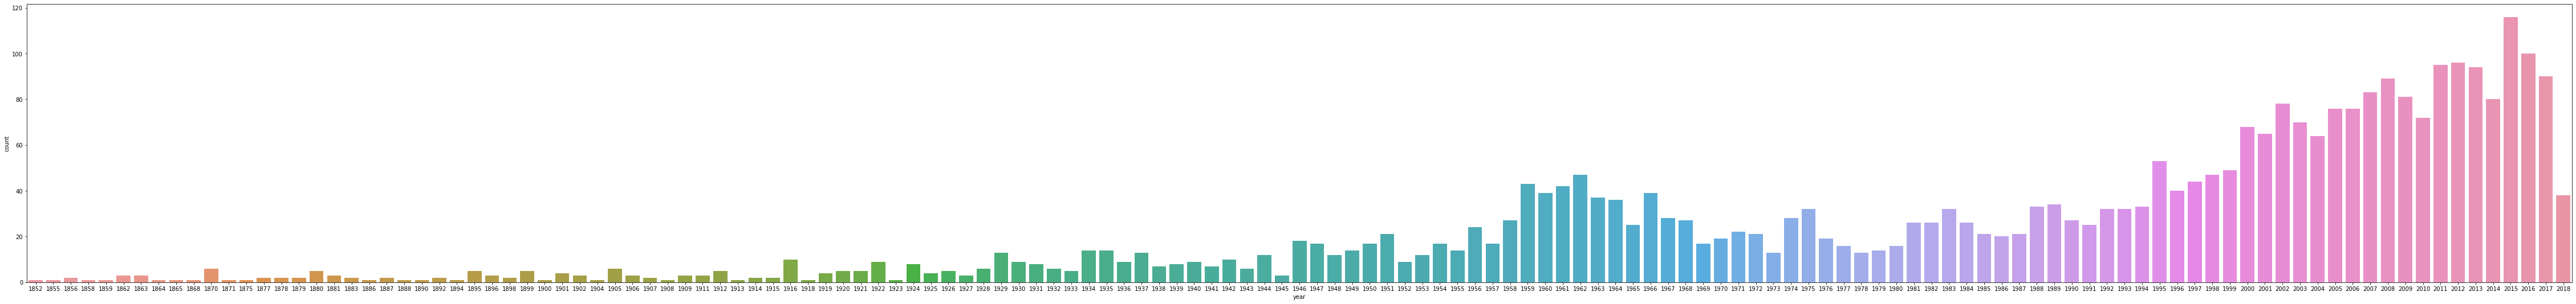

In [34]:
#plotting in another way - year
attacks = attacks.loc[attacks['year'] > 1850,:]
fig, ax = plt.subplots(figsize=(80, 9))
sns.countplot(ax=ax,x=attacks.year, )
fig.savefig('/Users/Juliana/Desktop/Ironhack/Projects/Ironhack-Project/figures/EDA/Year.png')

#### Sex

In [35]:
#count values to explore
attacks["sex"].value_counts()

M      2805
F       436
M         1
lli       1
Name: sex, dtype: int64

In [36]:
#count unique values
attacks["sex"].unique()

array(['F', 'M', 'M ', nan, 'lli'], dtype=object)

In [37]:
#cleaning values
attacks.loc[attacks['sex'].str.contains('M ', case=False, na=False), 'sex'] = 'M'
attacks.drop(attacks[attacks["sex"] == 'lli'].index, inplace=True)
attacks.drop(attacks[attacks["sex"] == 'nan'].index, inplace=True)

In [38]:
attacks["sex"].value_counts()

M    2806
F     436
Name: sex, dtype: int64

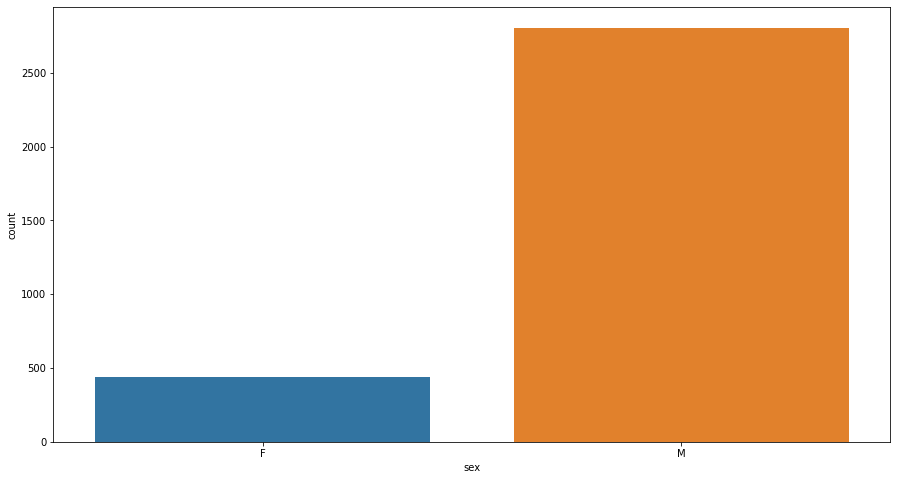

In [39]:
#ploting gender count
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(ax=ax,x=attacks.sex)
fig.savefig('/Users/Juliana/Desktop/Ironhack/Projects/Ironhack-Project/figures/EDA/Gender.png')

In [40]:
#creating a dummy variable
attacks["sex_count"]=attacks["sex"].replace(['M', 'F'],[1, 0], inplace=False)

In [41]:
attacks

,date,year,type,country,area,location,activity,sex,age,injury,fatal (y/n),species,month,sex_count
0,Jun,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark,Jun,0.0
1,Jun,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,NaN,Jun,0.0
2,Jun,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,NaN,Jun,1.0
6,Jun,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,M,18,FATAL,Y,Tiger shark,Jun,1.0
7,May,2018,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,Minor injury to foot. PROVOKED INCIDENT,N,"Lemon shark, 3'",May,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5991,Mar,1858,Unprovoked,AUSTRALIA,Victoria,Hobson Bay,Bathing,M,22,FATAL,Y,NaN,Mar,1.0
5996,Nov,1856,Unprovoked,NaN,NaN,NaN,Swimming,M,22,FATAL,Y,NaN,Nov,1.0
5998,Feb,1856,Unprovoked,AUSTRALIA,Victoria,Point Henry,Swimming,M,17,Severe bite to thigh. Not known if he survived,UNKNOWN,NaN,Feb,1.0
6002,Apr,1855,Unprovoked,AUSTRALIA,South Australia,Port Wakefield,Fell overboard from the Malacca,F,2½,FATAL,Y,NaN,Apr,0.0


#### Age

In [42]:
#count values to explore
attacks["age"].value_counts()

17                147
18                141
19                136
20                133
16                130
                 ... 
7      &    31      1
 30                 1
23 & 20             1
mid-30s             1
1                   1
Name: age, Length: 148, dtype: int64

In [43]:
#explore unique values
list(attacks["age"].unique())

['57',
 '11',
 '48',
 '18',
 '52',
 '15',
 '12',
 '32',
 '10',
 '21',
 '30',
 '60',
 '33',
 '29',
 '54',
 '34',
 '41',
 '37',
 '56',
 '19',
 '25',
 '69',
 '38',
 '55',
 '35',
 '46',
 '45',
 '14',
 '40s',
 '28',
 '20',
 '24',
 '26',
 '49',
 '22',
 '7',
 '31',
 '17',
 '40',
 '13',
 '42',
 '3',
 '8',
 '50',
 '16',
 '82',
 '73',
 '20s',
 '68',
 '51',
 '39',
 '58',
 'Teen',
 '47',
 '61',
 '65',
 '36',
 '66',
 '43',
 '60s',
 '9',
 '72',
 '59',
 '6',
 '27',
 '64',
 '23',
 '71',
 '44',
 '62',
 '63',
 '70',
 '18 months',
 '53',
 '30s',
 '50s',
 'teen',
 '77',
 '74',
 '28 & 26',
 '5',
 '86',
 '18 or 20',
 '12 or 13',
 '46 & 34',
 '28, 23 & 30',
 'Teens',
 '36 & 26',
 '8 or 10',
 '84',
 '\xa0 ',
 ' ',
 '30 or 36',
 '6½',
 '21 & ?',
 '75',
 '33 or 37',
 'mid-30s',
 '23 & 20',
 ' 30',
 '7      &    31',
 ' 28',
 '20?',
 '32 & 30',
 '16 to 18',
 '87',
 '67',
 'Elderly',
 'mid-20s',
 '74 ',
 '45 ',
 '21 or 26',
 '20 ',
 '>50',
 '18 to 22',
 'adult',
 '9 & 12',
 '? & 19',
 '25 to 35',
 '(adult)',
 '33

In [44]:
#extract age
attacks['age'] = attacks['age'].str.extract('(\d{1,2})', expand=True)

In [45]:
attacks["age"].unique()


array(['57', '11', '48', '18', '52', '15', '12', '32', '10', '21', '30',
       '60', '33', '29', '54', '34', '41', '37', '56', '19', '25', '69',
       '38', '55', '35', '46', '45', '14', '40', '28', '20', '24', '26',
       '49', '22', '7', '31', '17', '13', '42', '3', '8', '50', '16',
       '82', '73', '68', '51', '39', '58', nan, '47', '61', '65', '36',
       '66', '43', '9', '72', '59', '6', '27', '64', '23', '71', '44',
       '62', '63', '70', '53', '77', '74', '5', '86', '84', '75', '87',
       '67', '81', '78', '2', '1'], dtype=object)

In [46]:
#drop missing values
attacks.dropna(subset=['age'], inplace = True)
attacks.age = attacks.age.astype(int)

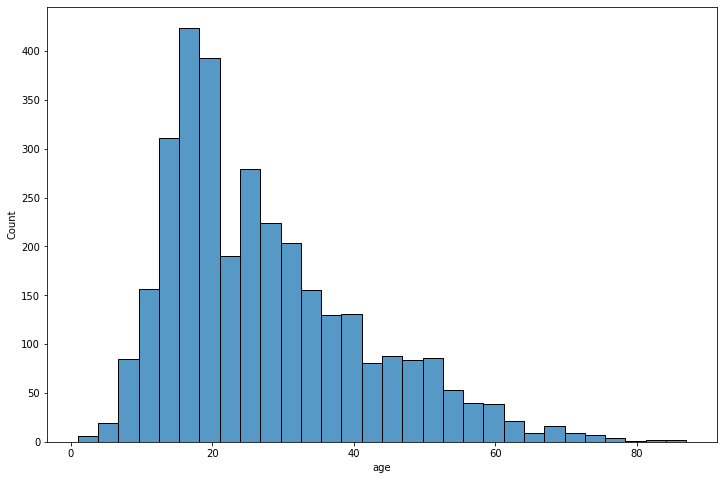

In [47]:
#plot age
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(ax=ax,x=attacks.age, bins=30)
fig.savefig('/Users/Juliana/Desktop/Ironhack/Projects/Ironhack-Project/figures/EDA/Age.png')

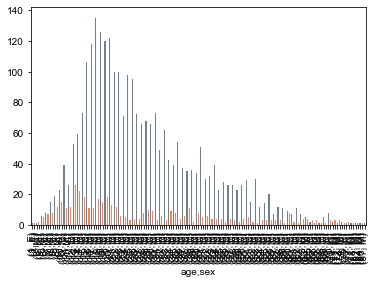

In [48]:
attacks.groupby(["age", "sex"])["sex"].count().plot(kind="bar", color=["slategray","coral"])
sns.set(rc={'figure.figsize': (20,15)})
sns.set_style('whitegrid')

#### Country and hypotheses testing

In [49]:
#count unique occurrences of countries
set(attacks["country"])

{' TONGA',
 'ADMIRALTY ISLANDS',
 'AMERICAN SAMOA',
 'ANDAMAN / NICOBAR ISLANDAS',
 'ARGENTINA',
 'ARUBA',
 'ATLANTIC OCEAN',
 'AUSTRALIA',
 'AZORES',
 'BAHAMAS',
 'BARBADOS',
 'BELIZE',
 'BERMUDA',
 'BRAZIL',
 'BRITISH ISLES',
 'BRITISH NEW GUINEA',
 'BRITISH VIRGIN ISLANDS',
 'BRITISH WEST INDIES',
 'CANADA',
 'CAPE VERDE',
 'CARIBBEAN SEA',
 'CAYMAN ISLANDS',
 'CENTRAL PACIFIC',
 'CHILE',
 'CHINA',
 'COLUMBIA',
 'COSTA RICA',
 'CROATIA',
 'CUBA',
 'DIEGO GARCIA',
 'DOMINICAN REPUBLIC',
 'ECUADOR',
 'EGYPT',
 'EGYPT ',
 'EL SALVADOR',
 'ENGLAND',
 'FEDERATED STATES OF MICRONESIA',
 'FIJI',
 'FRANCE',
 'FRENCH POLYNESIA',
 'Fiji',
 'GRAND CAYMAN',
 'GREECE',
 'GRENADA',
 'GUAM',
 'GUINEA',
 'HONDURAS',
 'HONG KONG',
 'INDIA',
 'INDONESIA',
 'IRAN',
 'IRAQ',
 'ISRAEL',
 'ITALY',
 'JAMAICA',
 'JAPAN',
 'KENYA',
 'KIRIBATI',
 'MADAGASCAR',
 'MALAYSIA',
 'MALDIVES',
 'MALTA',
 'MARSHALL ISLANDS',
 'MAURITIUS',
 'MEXICO',
 'MICRONESIA',
 'MID ATLANTIC OCEAN',
 'MOZAMBIQUE',
 'NEW BRITAIN',

In [50]:
#function country - hemisphere
def hemisphere(country):
    North=['ADMIRALTY ISLANDS',' TONGA','AMERICAN SAMOA','ARUBA', 'AZORES','BARBADOS','BAHAMAS', 'BERMUDA', 'BELIZE','BRITISH ISLES',
      'DOMINICAN REPUBLIC','COSTA RICA','CROATIA','CUBA','ENGLAND','CHINA','IRAQ','IRAN','ISRAEL','ITALY','JAPAN','COLUMBIA','CANADA','CENTRAL PACIFIC',
       'CARIBBEAN SEA', 'TURKS & CAICOS','ST. MAARTIN','ST. MARTIN', 'TRINIDAD & TOBAGO', 'TONGA','TAIWAN','VIETNAM','THAILAND','USA', 'SOUTH CHINA SEA', 'SOUTH KOREA','UNITED KINGDOM','UNITED ARAB EMIRATES (UAE)','UNITED ARAB EMIRATES','SRI LANKA', 'PUERTO RICO','PHILIPPINES','TURKEY','SPAIN','SINGAPORE','PALESTINIAN TERRITORIES','SOMALIA','SIERRA LEONE','PANAMA','SENEGAL', 'SAUDI ARABIA','SCOTLAND','RUSSIA','PORTUGAL','PALA','OKINAWA','NICARAGUA','NIGERIA','MICRONESIA','NEW BRITAIN','MID ATLANTIC OCEAN','MARSHALL ISLANDS', 'MALAYSIA','JAMAICA', 'INDIA', 'HONG KONG','HONDURAS','GUINEA','GUAM','GRENADA','EL SALVADOR', 'CAYMAN ISLANDS','GRAND CAYMAN','FEDERATED STATES OF MICRONESIA', 'MALTA', 'GREECE','FRANCE','MEXICO','NORWAY','BRITISH VIRGIN ISLANDS', 'BRITISH WEST INDIES',]
    South=['ARGENTINA','PAPUA NEW GUINEA', 'WESTERN SAMOA','URUGUAY','TANZANIA', 'SOLOMON ISLANDS','SAMOA','SEYCHELLES','ANDAMAN / NICOBAR ISLANDAS', 'AUSTRALIA', 'BRAZIL','BRITISH NEW GUINEA','CHILE','EGYPT ','EGYPT','CAPE VERDE','ECUADOR','FIJI','Fiji',
      'DIEGO GARCIA','NEW GUINEA','VANUATU','VENEZUELA','SOUTH AFRICA','NEW CALEDONIA','MOZAMBIQUE','NEW ZEALAND', 'KENYA','KIRIBATI','MADAGASCAR','MAURITIUS', 'MALDIVES','FRENCH POLYNESIA','INDONESIA',]
    if country in North:
        return 'North Hemisphere'
    elif country in South:
        return 'South Hemisphere'
    else:
        return ''

In [51]:
#new column hemisphere
attacks['hemisphere']=attacks['country'].apply(lambda x: hemisphere(x))

In [52]:
#function hemisphere - code
def season_hemisphere(month,hemisphere):
    North_dict={'Dec':'winter','Jan':'winter','Feb':'winter','Mar':'spring','Apr':'spring','May':'spring','Jun':'summer',
           'Jul':'summer','Aug':'summer','Sep':'autumn','Oct':'autumn','Nov':'autumn'}
    South_dict={'Dec':'summer','Jan':'summer','Feb':'summer','Mar':'autumn','Apr':'autumn','May':'autumn','Jun':'winter',
           'Jul':'winter','Aug':'winter','Sep':'spring','Oct':'spring','Nov':'spring'}
    if hemisphere == 'North Hemisphere':
        return North_dict[month]
    elif hemisphere == 'South Hemisphere':
        return South_dict[month]
    else:
        return ''

In [53]:
#new column season per month and hemisphere
attacks['season_hemisphere']=attacks.apply(lambda x: season_hemisphere(x['month'],x['hemisphere']),1)
attacks

,date,year,type,country,area,location,activity,sex,age,injury,fatal (y/n),species,month,sex_count,hemisphere,season_hemisphere
0,Jun,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark,Jun,0.0,North Hemisphere,summer
1,Jun,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,NaN,Jun,0.0,North Hemisphere,summer
2,Jun,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,NaN,Jun,1.0,North Hemisphere,summer
6,Jun,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,M,18,FATAL,Y,Tiger shark,Jun,1.0,South Hemisphere,winter
7,May,2018,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,Minor injury to foot. PROVOKED INCIDENT,N,"Lemon shark, 3'",May,1.0,North Hemisphere,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5991,Mar,1858,Unprovoked,AUSTRALIA,Victoria,Hobson Bay,Bathing,M,22,FATAL,Y,NaN,Mar,1.0,South Hemisphere,autumn
5996,Nov,1856,Unprovoked,NaN,NaN,NaN,Swimming,M,22,FATAL,Y,NaN,Nov,1.0,,
5998,Feb,1856,Unprovoked,AUSTRALIA,Victoria,Point Henry,Swimming,M,17,Severe bite to thigh. Not known if he survived,UNKNOWN,NaN,Feb,1.0,South Hemisphere,summer
6002,Apr,1855,Unprovoked,AUSTRALIA,South Australia,Port Wakefield,Fell overboard from the Malacca,F,2,FATAL,Y,NaN,Apr,0.0,South Hemisphere,autumn


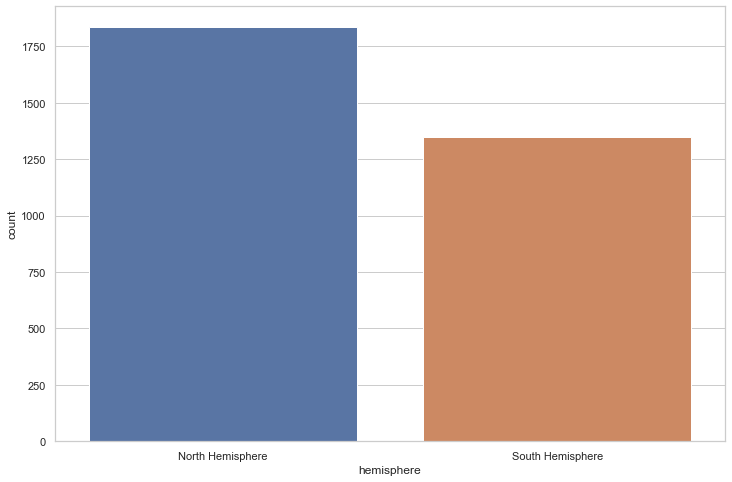

In [54]:
#Which hemisphere has more attacks?
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(ax=ax,x=attacks.loc[attacks['hemisphere']!=''].hemisphere)
fig.savefig('/Users/Juliana/Desktop/Ironhack/Projects/Ironhack-Project/figures/Attacks_per_hemisphere.png')

In [55]:
pwd

'/Users/Juliana/Desktop/Ironhack/Projects/Ironhack-Project'

In [56]:
#creating x and y for plotly
y_axis=['summer','winter','spring','autumn']
x_axis=[len(attacks.loc[attacks['season_hemisphere']=='summer']),
        len(attacks.loc[attacks['season_hemisphere']=='winter']),
        len(attacks.loc[attacks['season_hemisphere']=='spring']),
        len(attacks.loc[attacks['season_hemisphere']=='autumn'])]


In [57]:
#Do most attacks happen during summer?
fig=go.Figure(go.Bar(x=x_axis,y=y_axis,orientation='h'))
fig.show()

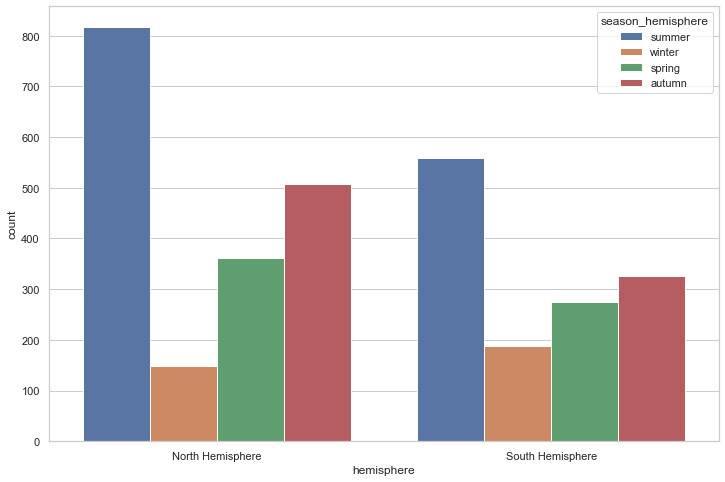

In [58]:
#Do most attacks happen during summer and winter comparing hemispheres?
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(ax=ax,data=attacks.loc[attacks['hemisphere']!=''], x="hemisphere", hue="season_hemisphere")
fig.savefig('/Users/Juliana/Desktop/Ironhack/Projects/Ironhack-Project/figures/Attacks_per_hemisphere_season.png')

In [59]:
#save dataset updated
attacks.to_csv('/Users/Juliana/Desktop/Ironhack/Projects/Ironhack-Project/output/attacks_updated.csv',index=False)